# Prelab 2
## Part 1

In [6]:
ls

 Volume in drive C is Windows
 Volume Serial Number is A241-1E17

 Directory of C:\Users\csiha\Downloads\ece420\lab2_frank\python

09/05/2025  01:16 AM    <DIR>          .
09/04/2025  11:45 PM    <DIR>          ..
09/04/2025  11:45 PM    <DIR>          .ipynb_checkpoints
09/05/2025  01:16 AM           636,569 prelab2.ipynb
09/04/2025  11:43 PM           146,270 with_hum.wav
09/04/2025  11:43 PM           146,270 without_hum.wav
               3 File(s)        929,109 bytes
               3 Dir(s)  88,962,547,712 bytes free


In [7]:
import os
print(os.getcwd())

C:\Users\csiha\Downloads\ece420\lab2_frank\python


### Load audio files

In [8]:
from scipy.io.wavfile import read
sampling_rate, data = read('with_hum.wav')

### Play audio

In [9]:
from IPython.display import Audio
Audio('with_hum.wav')

### Inline Plotting

In [10]:
%matplotlib inline

## Part 2
### Assignment 1

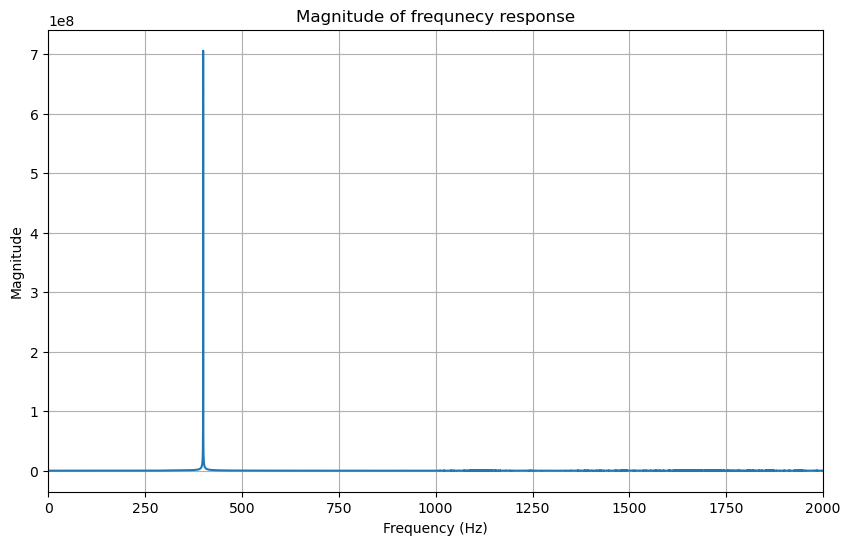

In [11]:
# Compute FFT
import numpy as np
import matplotlib.pyplot as plt

N = len(data)  # number of samples
fft_data = np.fft.fft(data)
freqs = np.fft.fftfreq(N, d=1/sampling_rate)

# Only keep the positive frequencies
magnitude = np.abs(fft_data)[:N//2]
freqs = freqs[:N//2]

# Plot magnitude spectrum
plt.figure(figsize=(10,6))
plt.plot(freqs, magnitude)
plt.title("Magnitude of frequnecy response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 2000)
plt.grid(True)
plt.show()


## Part 3
### Assignment 2

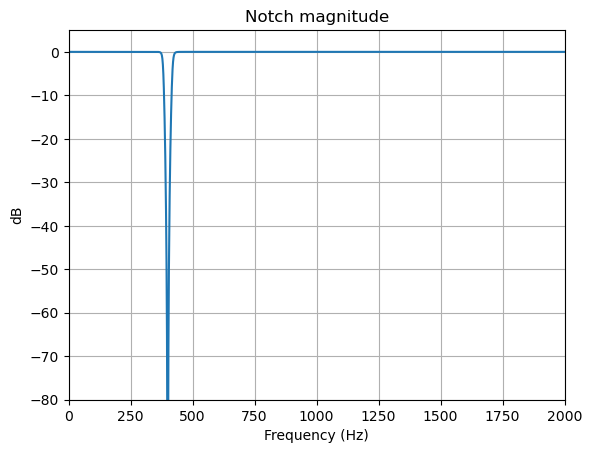

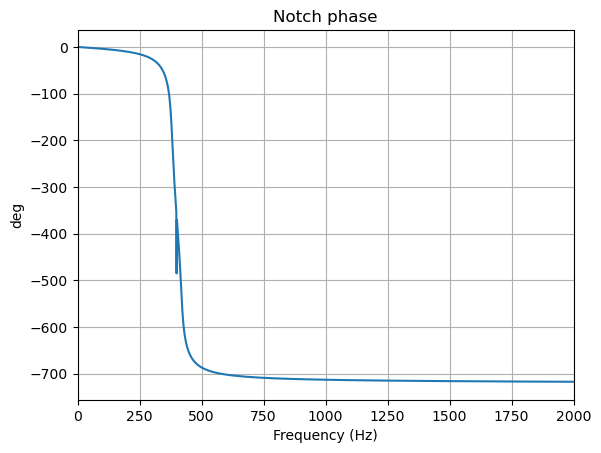

In [16]:
# notch around ~400 Hz 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

x  = data.astype(float)            # make sure it's float
fs = float(sampling_rate)

f0 = 400        # center of the hum (Hz)
bw = 40         # width of the notch
lo, hi = f0 - bw/2, f0 + bw/2

b, a = butter(4, [lo, hi], btype='bandstop', fs=fs)
w, h = freqz(b, a, worN=4096, fs=fs)

plt.figure()
plt.plot(w, 20*np.log10(np.abs(h) + 1e-12))
plt.title('Notch magnitude')
plt.xlabel('Frequency (Hz)'); plt.ylabel('dB')
plt.xlim(0, 2000); plt.ylim(-80, 5); plt.grid(True)

plt.figure()
plt.plot(w, np.degrees(np.unwrap(np.angle(h))))
plt.title('Notch phase')
plt.xlabel('Frequency (Hz)'); plt.ylabel('deg')
plt.xlim(0, 2000); plt.grid(True)


### Question

I designed a 4th-order Butterworth band-stop filter centered at **400 Hz** with \~40 Hz bandwidth. The higher order ensures deep attenuation at the hum while keeping the rest of the spectrum flat.

With fewer taps (lower order), the filter would be lighter and faster but give weaker, wider suppression, leaving some hum or cutting nearby audio. More taps give a sharper notch but at the cost of higher computation and possible ringing.


## Part 4
### Assignment 3

fs=8000.0 Hz | Nyquist=4000.0 Hz | N=73113


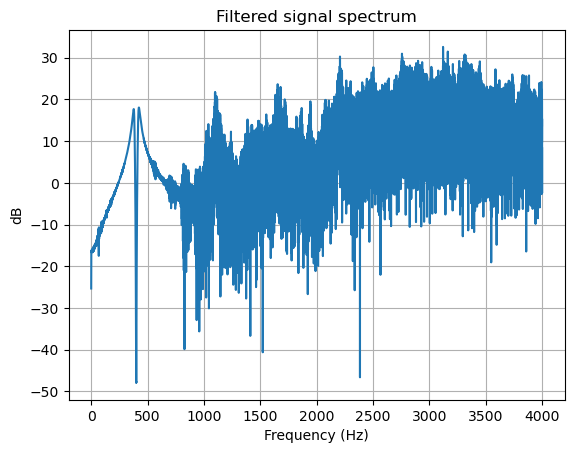

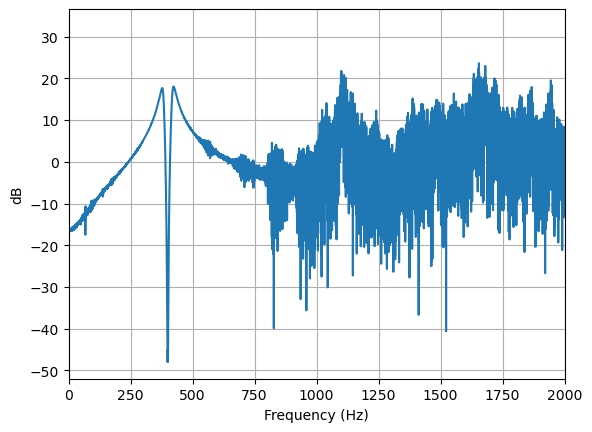

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from IPython.display import Audio

# run the filter
y = lfilter(b, a, x)

# one-sided FFT
N   = len(y)
freq = np.fft.rfftfreq(N, 1/fs)
Y    = np.fft.rfft(y)
mag_db = 20*np.log10(np.abs(Y)/N + 1e-12)

print(f"fs={fs:.1f} Hz | Nyquist={fs/2:.1f} Hz | N={N}")

# full view
plt.figure()
plt.plot(freq, mag_db)
plt.title('Filtered signal spectrum')
plt.xlabel('Frequency (Hz)'); plt.ylabel('dB')
plt.grid(True)

# zoom near the hum band
plt.figure()
plt.plot(freq, mag_db)
plt.xlim(0, min(2000, fs/2))
plt.xlabel('Frequency (Hz)'); plt.ylabel('dB')
plt.grid(True)

# listen
Audio(y, rate=int(fs))
